In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Problem 1 

## 1.  List the code of the airlines most at fault for the delays in cities that exceed the 95th percentile of delayed departures between 75 to 89 minutes during the month of January 2015.

In [2]:
dataframe = pd.read_csv('786930375_T_ONTIME.csv', engine = 'c')
#Use .info() to check what the csv file contains 
dataframe.info()
#Use .head () to see the first few 5 rows of the csv file imported 
dataframe.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469968 entries, 0 to 469967
Data columns (total 5 columns):
UNIQUE_CARRIER      469968 non-null object
ORIGIN_CITY_NAME    469968 non-null object
DEP_DELAY           458311 non-null float64
DEP_DEL15           458311 non-null float64
Unnamed: 4          0 non-null float64
dtypes: float64(3), object(2)
memory usage: 17.9+ MB


,UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEP_DELAY,DEP_DEL15,Unnamed: 4
0,AA,"New York, NY",-5.0,0.0,NaN
1,AA,"New York, NY",-10.0,0.0,NaN
2,AA,"New York, NY",-7.0,0.0,NaN
3,AA,"New York, NY",-7.0,0.0,NaN
4,AA,"New York, NY",-7.0,0.0,NaN


From `df.info()` we can see that there are 5 columns that are relevant to our analysis. 
The last column is filled with undefined and Unrepresetable value NaN.
The Column will be dropped in the next cell. 
Pandas automatically adds an index column to the data set if we don't edit the parameters `pd.read_csv()` takes.

In [3]:
#setting the delay time to be in between 75 and 89
df = dataframe[(dataframe['DEP_DELAY'] >= 75) & (dataframe['DEP_DELAY'] <= 89)]


#now group them by cities
citydelays = df.groupby('ORIGIN_CITY_NAME')
df.head(5)

,UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEP_DELAY,DEP_DEL15,Unnamed: 4
99,AA,"Los Angeles, CA",82.0,1.0,NaN
128,AA,"Dallas/Fort Worth, TX",89.0,1.0,NaN
191,AA,"Dallas/Fort Worth, TX",84.0,1.0,NaN
373,AA,"New York, NY",82.0,1.0,NaN
442,AA,"Atlanta, GA",89.0,1.0,NaN


In [4]:
#count the number of cities
len(citydelays)

245

Using `len(3)` we get that there are 245 cities given in this particular data set. Conclude that the 95 percentile to be the cities with the most delays. Therefore we take 5% of the total amount of cities which is $245*0.05 = 12.25$. We can not take $12.25$ nor the average of $(12+13) = 12.5$ Cities ($12.25$ cities does not exist). Since $\frac{12}{245} = 0.04897...$ and $\frac{13}{245} = 0.05306...$ we take the one that exceeds the 95 percentile, which is 12 cities. 

In [5]:
delayedmost = citydelays.size().sort_values(ascending = False)[:12]
delayedmost

ORIGIN_CITY_NAME
Chicago, IL              544
Dallas/Fort Worth, TX    285
Denver, CO               273
Atlanta, GA              261
New York, NY             214
Houston, TX              164
San Francisco, CA        160
Los Angeles, CA          146
Phoenix, AZ              117
Washington, DC           115
Detroit, MI              114
Orlando, FL              113
dtype: int64

The $12$ cities with most delays sorted in ascending order from most delays to least.
The plot is to show the amount of delays in the top 12 most delayed cities. 

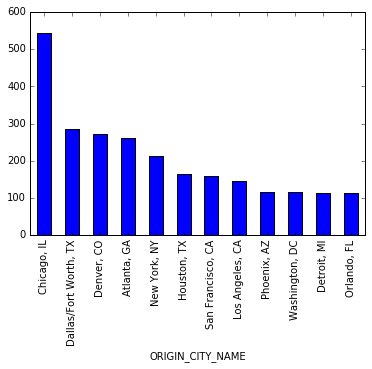

In [6]:
delayedmost.plot(kind = 'bar')

In [7]:
#check the amount of Airplane Carriers in this data set
df['UNIQUE_CARRIER'].unique()

array(['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA',
       'US', 'VX', 'WN'], dtype=object)

In [8]:
#this visualises the amount of delays by each airline in the certain city. 
carrier = df.groupby(['ORIGIN_CITY_NAME', 'UNIQUE_CARRIER']).size()
carrier

ORIGIN_CITY_NAME                UNIQUE_CARRIER
Abilene, TX                     MQ                  2
Aguadilla, PR                   B6                  2
                                UA                  1
Akron, OH                       DL                  2
                                EV                  3
                                WN                  4
Albany, GA                      EV                  2
Albany, NY                      US                  2
                                WN                  1
Albuquerque, NM                 DL                  1
                                EV                  1
                                MQ                  1
                                OO                  2
                                WN                  8
Alexandria, LA                  EV                  1
Allentown/Bethlehem/Easton, PA  EV                  1
Alpena, MI                      OO                  1
Amarillo, TX                    EV 

## 2. Create a visualisation to demonstrate your results. (use whatever you like)

Including Question Three since I  plotted the percentage of delayed departures as the visualization

From `delayedmost` we have concluded that the 12 cities above have had the most delays. Now we will `delayedmost`to find out the which airline was responsible for the delays in each of these cities. By creating visualization such as bar graphs that graph out the percentage to show the distribution of delays by airlines in each city. 



In [9]:
delayedmost

ORIGIN_CITY_NAME
Chicago, IL              544
Dallas/Fort Worth, TX    285
Denver, CO               273
Atlanta, GA              261
New York, NY             214
Houston, TX              164
San Francisco, CA        160
Los Angeles, CA          146
Phoenix, AZ              117
Washington, DC           115
Detroit, MI              114
Orlando, FL              113
dtype: int64

We start off by analyzing 'Chicago, IL' with the most delayed flights and in order end at 'Orlando, FL'. 

### Chicago, IL

In [10]:
chicago = df[df['ORIGIN_CITY_NAME'] == 'Chicago, IL'].groupby('UNIQUE_CARRIER').size().sort_values(ascending = True)
chicago

UNIQUE_CARRIER
VX      1
B6      2
DL      7
F9      9
US     10
NK     17
AA     54
EV     61
OO     70
WN     85
UA     94
MQ    134
dtype: int64

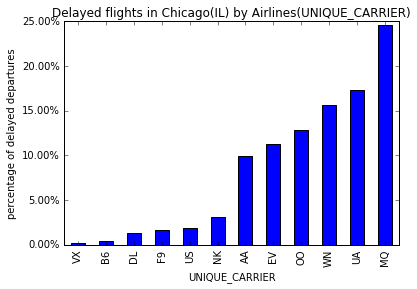

In [11]:
sum = chicago.sum()
y = chicago/sum
x = y.plot(kind = 'bar',title = 'Delayed flights in Chicago(IL) by Airlines(UNIQUE_CARRIER)')
vals = x.get_yticks()
plt.axes().set_ylabel('percentage of delayed departures')
x.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show();

In [12]:
#the exact percentage at fault
exactpercentage = y*100
exactpercentage

UNIQUE_CARRIER
VX     0.183824
B6     0.367647
DL     1.286765
F9     1.654412
US     1.838235
NK     3.125000
AA     9.926471
EV    11.213235
OO    12.867647
WN    15.625000
UA    17.279412
MQ    24.632353
dtype: float64

### Dallas/Fort Worth, TX


In [13]:
dallas = df[df['ORIGIN_CITY_NAME'] == 'Dallas/Fort Worth, TX'].groupby('UNIQUE_CARRIER').size().sort_values(ascending = True)
dallas

UNIQUE_CARRIER
F9      1
UA      1
B6      2
DL      4
OO      5
US      5
NK      9
EV     20
MQ     91
AA    147
dtype: int64

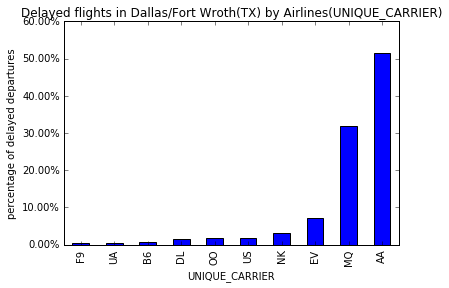

In [14]:
sum = dallas.sum()
y = dallas/sum
x = y.plot(kind = 'bar',title = 'Delayed flights in Dallas/Fort Wroth(TX) by Airlines(UNIQUE_CARRIER)')
vals = x.get_yticks()
plt.axes().set_ylabel('percentage of delayed departures')
x.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show();

In [15]:
#the exact percentage at fault
exactpercentage = y*100
exactpercentage

UNIQUE_CARRIER
F9     0.350877
UA     0.350877
B6     0.701754
DL     1.403509
OO     1.754386
US     1.754386
NK     3.157895
EV     7.017544
MQ    31.929825
AA    51.578947
dtype: float64

### Denver, CO

In [16]:
denver = df[df['ORIGIN_CITY_NAME'] == 'Denver, CO'].groupby('UNIQUE_CARRIER').size().sort_values(ascending = True)
denver

UNIQUE_CARRIER
US     3
DL     4
NK     5
AA     6
EV    20
F9    22
UA    50
WN    70
OO    93
dtype: int64

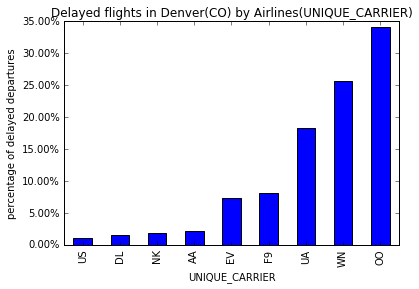

In [17]:
sum = denver.sum()
y = denver/sum
x = y.plot(kind = 'bar',title = 'Delayed flights in Denver(CO) by Airlines(UNIQUE_CARRIER)')
vals = x.get_yticks()
plt.axes().set_ylabel('percentage of delayed departures')
x.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show();

In [18]:
#the exact percentage at fault
exactpercentage = y*100
exactpercentage

UNIQUE_CARRIER
US     1.098901
DL     1.465201
NK     1.831502
AA     2.197802
EV     7.326007
F9     8.058608
UA    18.315018
WN    25.641026
OO    34.065934
dtype: float64

### Atlanta, GA

In [19]:
atlanta = df[df['ORIGIN_CITY_NAME'] == 'Atlanta, GA'].groupby('UNIQUE_CARRIER').size().sort_values(ascending = True)
atlanta

UNIQUE_CARRIER
F9      2
UA      2
US      3
AA      4
MQ      4
NK      4
OO      6
WN     42
EV     83
DL    111
dtype: int64

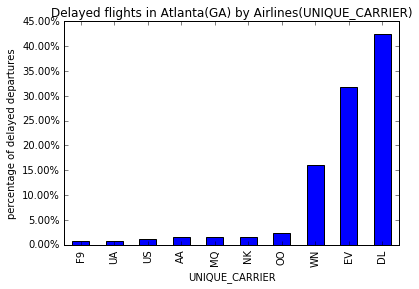

In [20]:
sum = atlanta.sum()
y = atlanta/sum
x = y.plot(kind = 'bar',title = 'Delayed flights in Atlanta(GA) by Airlines(UNIQUE_CARRIER)')
vals = x.get_yticks()
plt.axes().set_ylabel('percentage of delayed departures')
x.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show();

In [21]:
#the exact percentage at fault
exactpercentage = y*100
exactpercentage

UNIQUE_CARRIER
F9     0.766284
UA     0.766284
US     1.149425
AA     1.532567
MQ     1.532567
NK     1.532567
OO     2.298851
WN    16.091954
EV    31.800766
DL    42.528736
dtype: float64

### New York, NY

In [22]:
ny = df[df['ORIGIN_CITY_NAME'] == 'New York, NY'].groupby('UNIQUE_CARRIER').size().sort_values(ascending = True)
ny

UNIQUE_CARRIER
VX     1
NK     6
WN    12
US    17
UA    18
AA    20
EV    20
MQ    37
B6    39
DL    44
dtype: int64

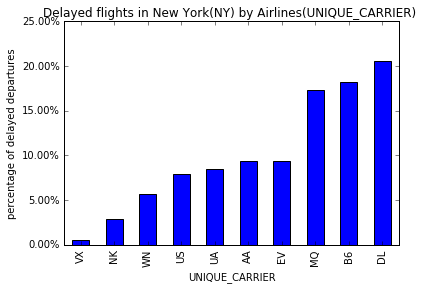

In [23]:
sum = ny.sum()
y = ny/sum
x = y.plot(kind = 'bar',title = 'Delayed flights in New York(NY) by Airlines(UNIQUE_CARRIER) ')
vals = x.get_yticks()
plt.axes().set_ylabel('percentage of delayed departures')
x.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show();

In [24]:
#the exact percentage at fault
exactpercentage = y*100
exactpercentage

UNIQUE_CARRIER
VX     0.467290
NK     2.803738
WN     5.607477
US     7.943925
UA     8.411215
AA     9.345794
EV     9.345794
MQ    17.289720
B6    18.224299
DL    20.560748
dtype: float64

### Houston, TX 

In [25]:
houston = df[df['ORIGIN_CITY_NAME'] == 'Houston, TX'].groupby('UNIQUE_CARRIER').size().sort_values(ascending = True)
houston

UNIQUE_CARRIER
DL     1
F9     1
AA     2
MQ     3
NK     6
US     6
OO    26
WN    29
EV    44
UA    46
dtype: int64

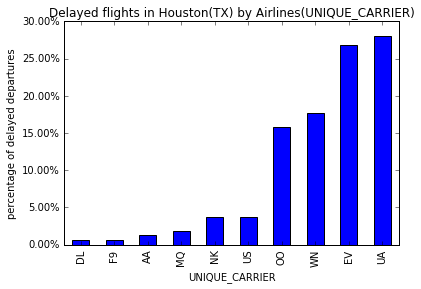

In [26]:
sum = houston.sum()
y = houston/sum
x = y.plot(kind = 'bar',title = 'Delayed flights in Houston(TX) by Airlines(UNIQUE_CARRIER)')
vals = x.get_yticks()
plt.axes().set_ylabel('percentage of delayed departures')
x.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show();

In [27]:
#the exact percentage at fault
exactpercentage = y*100
exactpercentage

UNIQUE_CARRIER
DL     0.609756
F9     0.609756
AA     1.219512
MQ     1.829268
NK     3.658537
US     3.658537
OO    15.853659
WN    17.682927
EV    26.829268
UA    28.048780
dtype: float64

### San Francisco, CA 

In [28]:
sf = df[df['ORIGIN_CITY_NAME'] == 'San Francisco, CA'].groupby('UNIQUE_CARRIER').size().sort_values(ascending = True)
sf

UNIQUE_CARRIER
F9     1
DL     2
B6     3
AA     6
VX     8
AS     9
WN    16
UA    38
OO    77
dtype: int64

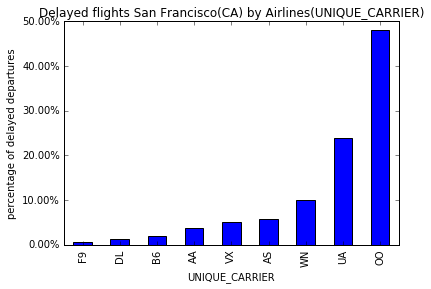

In [29]:
sum = sf.sum()
y = sf/sum
x = y.plot(kind = 'bar',title = 'Delayed flights San Francisco(CA) by Airlines(UNIQUE_CARRIER)')
vals = x.get_yticks()
plt.axes().set_ylabel('percentage of delayed departures')
x.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show();

In [30]:
#the exact percentage at fault
exactpercentage = y*100
exactpercentage

UNIQUE_CARRIER
F9     0.625
DL     1.250
B6     1.875
AA     3.750
VX     5.000
AS     5.625
WN    10.000
UA    23.750
OO    48.125
dtype: float64

### Los Angeles, CA

In [31]:
la = df[df['ORIGIN_CITY_NAME'] == 'Los Angeles, CA'].groupby('UNIQUE_CARRIER').size().sort_values(ascending = True)
la

UNIQUE_CARRIER
AS     1
B6     2
US     2
NK     3
DL     7
VX    10
AA    17
UA    27
WN    36
OO    41
dtype: int64

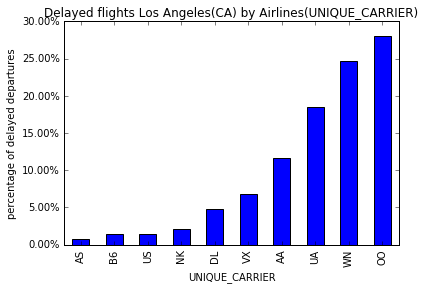

In [32]:
sum = la.sum()
y = la/sum
x = y.plot(kind = 'bar',title = 'Delayed flights Los Angeles(CA) by Airlines(UNIQUE_CARRIER)')
vals = x.get_yticks()
plt.axes().set_ylabel('percentage of delayed departures')
x.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
#plt.show();

In [33]:
#the exact percentage at fault
exactpercentage = y*100
exactpercentage

UNIQUE_CARRIER
AS     0.684932
B6     1.369863
US     1.369863
NK     2.054795
DL     4.794521
VX     6.849315
AA    11.643836
UA    18.493151
WN    24.657534
OO    28.082192
dtype: float64

### Phoenix, AZ 

In [34]:
phoenix = df[df['ORIGIN_CITY_NAME'] == 'Phoenix, AZ'].groupby('UNIQUE_CARRIER').size().sort_values(ascending = True)
phoenix

UNIQUE_CARRIER
NK     1
DL     2
F9     3
UA     6
AA     8
OO    13
US    38
WN    46
dtype: int64

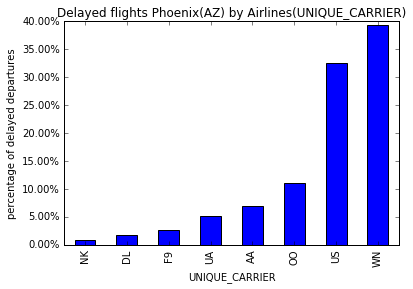

In [35]:
sum = phoenix.sum()
y = phoenix/sum
x = y.plot(kind = 'bar',title = 'Delayed flights Phoenix(AZ) by Airlines(UNIQUE_CARRIER)')
vals = x.get_yticks()
plt.axes().set_ylabel('percentage of delayed departures')
x.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show();

In [36]:
#the exact percentage at fault
exactpercentage = y*100
exactpercentage

UNIQUE_CARRIER
NK     0.854701
DL     1.709402
F9     2.564103
UA     5.128205
AA     6.837607
OO    11.111111
US    32.478632
WN    39.316239
dtype: float64

### Washington, DC

In [37]:
washington = df[df['ORIGIN_CITY_NAME'] == 'Washington, DC'].groupby('UNIQUE_CARRIER').size().sort_values(ascending = True)
washington 

UNIQUE_CARRIER
AS     1
VX     2
OO     3
F9     4
MQ     4
DL     7
AA     9
US    12
B6    13
WN    14
UA    18
EV    28
dtype: int64

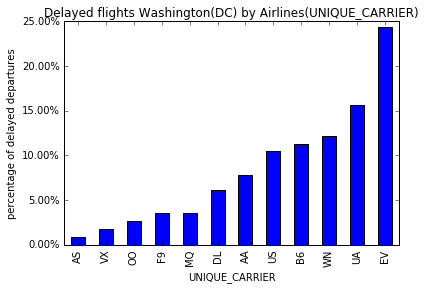

In [38]:
sum = washington.sum()
y = washington/sum
x = y.plot(kind = 'bar',title = 'Delayed flights Washington(DC) by Airlines(UNIQUE_CARRIER)')
vals = x.get_yticks()
plt.axes().set_ylabel('percentage of delayed departures')
x.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show();

In [39]:
#the exact percentage at fault
exactpercentage = y*100
exactpercentage

UNIQUE_CARRIER
AS     0.869565
VX     1.739130
OO     2.608696
F9     3.478261
MQ     3.478261
DL     6.086957
AA     7.826087
US    10.434783
B6    11.304348
WN    12.173913
UA    15.652174
EV    24.347826
dtype: float64

### Detroit, MI             


In [40]:
detroit = df[df['ORIGIN_CITY_NAME'] == 'Detroit, MI'].groupby('UNIQUE_CARRIER').size().sort_values(ascending = True)
detroit

UNIQUE_CARRIER
B6     1
US     2
WN     7
MQ     9
OO     9
NK    15
DL    35
EV    36
dtype: int64

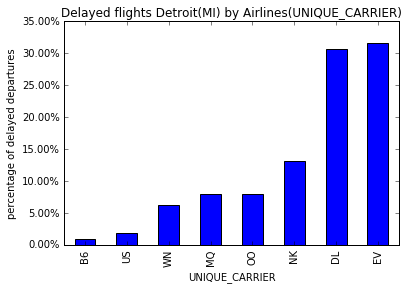

In [41]:
sum = detroit.sum()
y = detroit/sum
x = y.plot(kind = 'bar',title = 'Delayed flights Detroit(MI) by Airlines(UNIQUE_CARRIER)')
vals = x.get_yticks()
plt.axes().set_ylabel('percentage of delayed departures')
x.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show();

In [42]:
#the exact percentage at fault
exactpercentage = y*100
exactpercentage

UNIQUE_CARRIER
B6     0.877193
US     1.754386
WN     6.140351
MQ     7.894737
OO     7.894737
NK    13.157895
DL    30.701754
EV    31.578947
dtype: float64

### Orlando, FL 

In [43]:
orlando = df[df['ORIGIN_CITY_NAME'] == 'Orlando, FL'].groupby('UNIQUE_CARRIER').size().sort_values(ascending = True)
orlando

UNIQUE_CARRIER
US     4
NK     6
DL     9
F9     9
UA    11
AA    14
WN    20
B6    40
dtype: int64

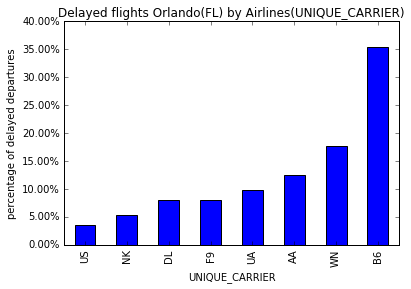

In [44]:
sum = orlando.sum()
y = orlando/sum
x = y.plot(kind = 'bar',title = 'Delayed flights Orlando(FL) by Airlines(UNIQUE_CARRIER)')
vals = x.get_yticks()
plt.axes().set_ylabel('percentage of delayed departures')
x.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show();

In [45]:
#the exact percentage at fault
exactpercentage = y*100
exactpercentage

UNIQUE_CARRIER
US     3.539823
NK     5.309735
DL     7.964602
F9     7.964602
UA     9.734513
AA    12.389381
WN    17.699115
B6    35.398230
dtype: float64

## Total amount of delayed flights by airline in the top the 12 delayed cities in the U.S.

We can conclude that WN(Southwest Airlines) has the most delays following by OO. 

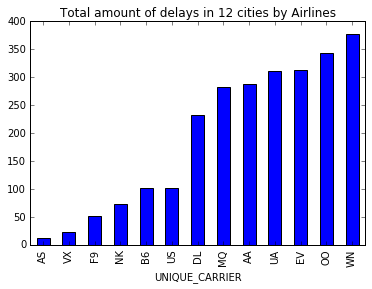

In [46]:
total = df[df['ORIGIN_CITY_NAME'].str.contains('Chicago, IL|Dallas/Fort Worth, TX|Denver, CO|Atlanta, GA|New York, NY|Houston, TX|San Francisco, CA|Los Angeles, CA|Phoenix, AZ|Washington, DC|Detroit, MI|Orlando, FL')]
total.groupby('UNIQUE_CARRIER').size().sort_values(ascending=True).plot.bar(title = 'Total amount of delays in 12 cities by Airlines')

### Interesting visualization (cities with most early departures) 
    What's interesting is that the same cities that have the most delayed departures can also have the most early flights. New York holds the most early departures in January of 2015. 

In [47]:
#<-10 meaning at least 10 minutes earlier
df2 = dataframe[dataframe['DEP_DELAY'] < -10]
df2 = df2.groupby('ORIGIN_CITY_NAME').size()
df2.sort_values(ascending = True)[-12:]

ORIGIN_CITY_NAME
Seattle, WA           225
Orlando, FL           237
Denver, CO            261
Chicago, IL           263
Houston, TX           275
Salt Lake City, UT    285
San Diego, CA         292
San Francisco, CA     303
Washington, DC        311
Los Angeles, CA       341
Las Vegas, NV         369
New York, NY          379
dtype: int64

## Further Analysis 

Assumption for further research:
The data given seems to show relationship with the major Airports in the U.S.(major airports defined by total passenger boardings). The more of the total passenger boardings the more likely it has of delays. [Major Airports](https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States) We can see in the link that the the top 4 cities the major airports are the same as the ones that has the most delays. The others major flight delayed cities are also quite similar in comparison to the list of major airport cities. This requries further research. 


# Problem 2

## Answer

$P{(A)}=0.8$ Probability of being detected by drone A

$P{(B)}=0.9$ Probability of being detected by drone B

$P{(A \cap B) = 0.8*0.9 = 0.72}$ Probability of being detected by both drone A and B

$P{(Located|A)} = 0.7$ Probability of being located given that drone A has detected the person

$P{(Located|B)} = 0.4$ Probability of being located given that drone B has detected the person

This question is a sum of cases 

    Case 1.
located by A given detected by A and not by B 

$P{(Located|A)}*P{(A)}*P{(B)}^{C}= 0.7 * 0.8 * 0.1 = 0.056$

    Case 2 
located by B given detected by B and not by A 

$P{(Located|B)}*P{(B)}*P{(A)}^{C}= 0.4 * 0.9 * 0.2 = 0.072$

    Case 3 
located by both given detected by both 


$P{(Located|{(A \cap B)})}*{P{(A \cap B)}} = 1*0.8*0.9 = 0.72$

    Case 4 
not located by both given not detected by both 

$P{(Located|{(A^{c} \cap B^{c})})}*{P{(A^{c} \cap B^{c})}}= 0.2*0.1*0 = 0$

    
    The sum of 4 cases would be 0.056+0.072+0.72 = 0.848$

    Around 85 percent chance for a person to be succesfully located by either drone A or B. 
    



